# Data exploration from Cereals dataset from kaggle
ref: https://www.kaggle.com/crawford/80-cereals

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df_original = pd.read_csv("cereal.csv")
df = df_original.copy()

In [3]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


### Variables Explanation
* Name: Name of cereal
* mfr: Manufacturer of cereal
    - A = American Home Food Products;
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
* type:
    - cold
    - hot
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: a rating of the cereals (Possibly from Consumer Reports?)

### Possible questions ans tasks:
    * Convert cups to gramms
    * How many manufacturers?
    * Top 5 ratings
    * Is there any relation between the shelfs and ratings? (maybe best ratings reside on better shelf)
    * Unhealthiest cereals
    * Healthiest cereals
    * Train a rating estimator

In [5]:
#cups to gramms convertion
# 1 cup = 236.6 gramms
df["weight"] = df["cups"]*236.6

In [6]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,78.078,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,236.600,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,78.078,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,118.300,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,177.450,0.75,34.384843


In [7]:
qty_manufacturers = len(df["mfr"].unique())
manufacturers = {"K":"Kelloggs","G":"General Mills","P":"Post","Q":"Quaker Oats","R":"Ralston Purina","N":"Nabisco","A":"American Home Food Products"}

print("We have",qty_manufacturers,"manufacturers, and each one has the below quantity of brands:")
for abv in manufacturers:
    print(manufacturers[abv],"-",len(df[df["mfr"]==abv]))


We have 7 manufacturers, and each one has the below quantity of brands:
Kelloggs - 23
General Mills - 22
Post - 9
Quaker Oats - 8
Ralston Purina - 8
Nabisco - 6
American Home Food Products - 1


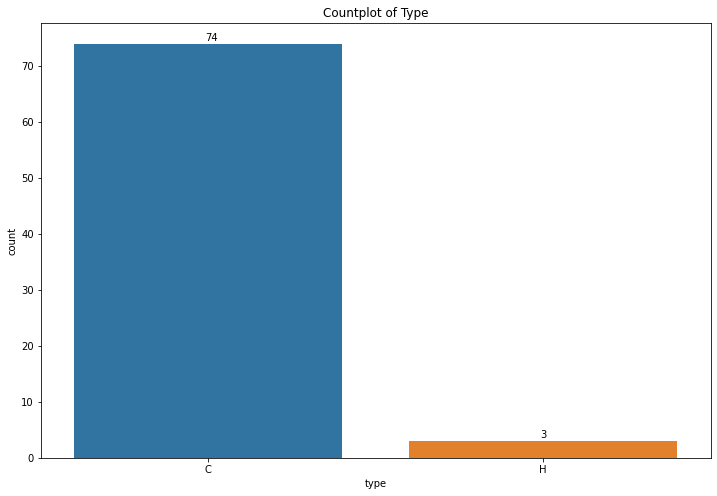

In [8]:
plt.figure(figsize=(12,8))
bar_plot = sns.countplot(x="type",data=df)
plt.title("Countplot of Type")

for p in bar_plot.patches:
    bar_plot.annotate("{:.0f}".format(p.get_height()),(p.get_x()+0.39,p.get_height()+0.5))

In [9]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,194.257818,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,55.060638,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,59.150000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,158.522000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,177.450000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,236.600000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,354.900000,1.500000,93.704912


In [10]:
df.drop(["cups"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  rating    77 non-null     float64
dtypes: float64(4), int64(8), object(3)
memory usage: 9.1+ KB


In [11]:
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(nrows=3,ncols=4,figure=fig)

<Figure size 432x288 with 0 Axes>

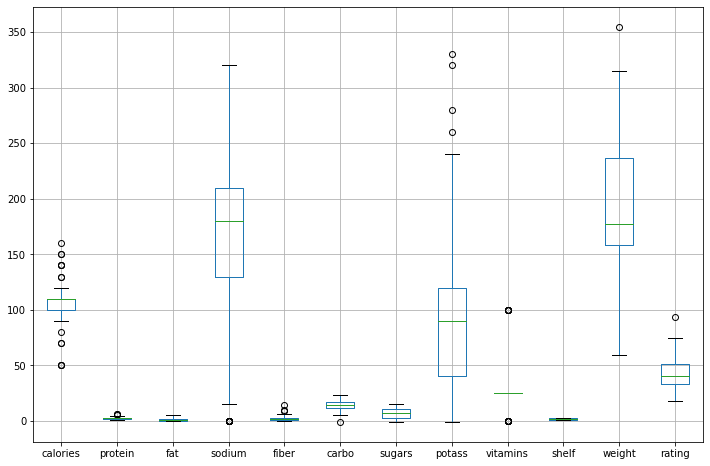

In [12]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.show()

In [13]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'rating'],
      dtype='object')

In [14]:
plot1 = ['calories',   'sodium', 
       'potass', 'vitamins', 'weight']
plot2 = ['protein','fat','fiber', 'carbo', 'sugars',]

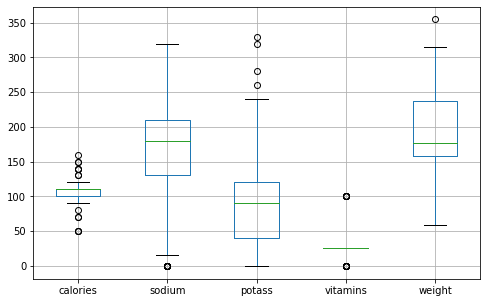

In [15]:
plt.figure(figsize=(8,5))
df.boxplot(column=plot1)
plt.show()

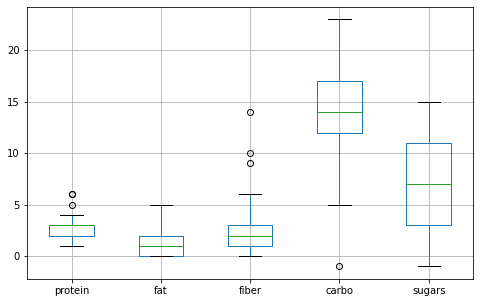

In [16]:
plt.figure(figsize=(8,5))
df.boxplot(column=plot2)
plt.show()

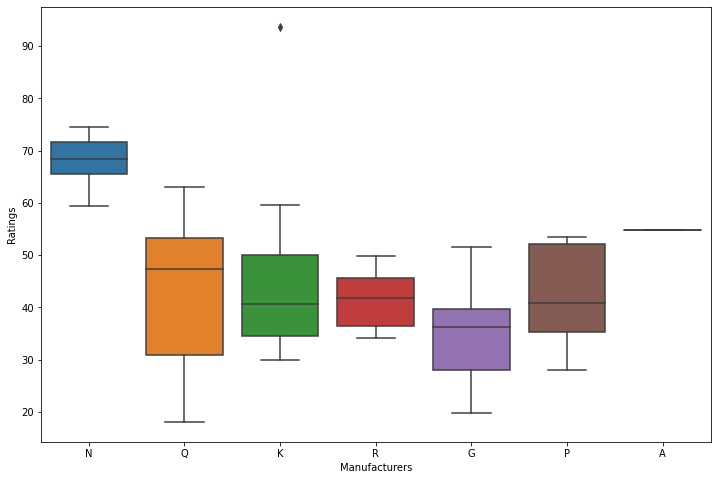

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df["mfr"],y=df["rating"])
plt.xlabel("Manufacturers")
plt.ylabel("Ratings")
plt.show()

In [18]:
df["mfr"].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [19]:
manufacturers.values()

dict_values(['Kelloggs', 'General Mills', 'Post', 'Quaker Oats', 'Ralston Purina', 'Nabisco', 'American Home Food Products'])

According to boxplot, Kelloggs must have ONE (maybe more, but only a few) product that is highlighted, let discover which one is

In [20]:
df[df["mfr"]=="K"].sort_values("rating",ascending=False).head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,118.300,93.704912
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,236.600,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,78.078,59.425505
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,189.280,58.345141
60,Raisin Squares,K,C,90,2,0,0,2.0,15.0,6,110,25,3,118.300,55.333142


Yeah, that's right, there is only one cereal from Kellogs that is highlighted, and that's the most well rated one from this dataset. Don't know how they were rated, but on the dataset page from kaggle, the owner of this dataset thinks it was from Consumer Reports

<AxesSubplot:>

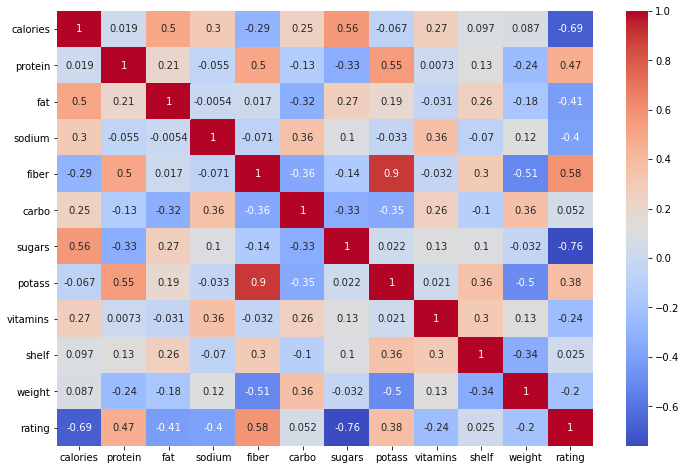

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

D:\Anaconda\envs\curso_mit\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

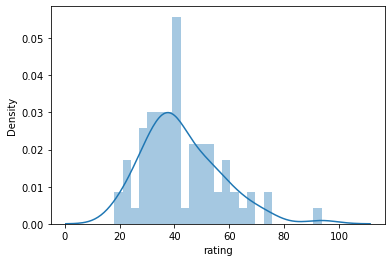

In [22]:
sns.distplot(df["rating"],bins=25)

#### Looking for relation between shelfs and ratings

D:\Anaconda\envs\curso_mit\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='shelf', ylabel='rating'>

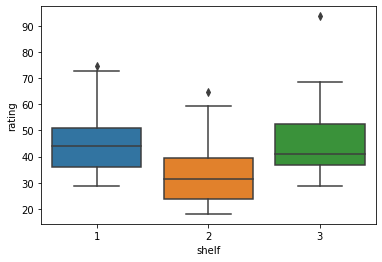

In [23]:
sns.boxplot(df["shelf"],df["rating"])

<Figure size 864x576 with 0 Axes>

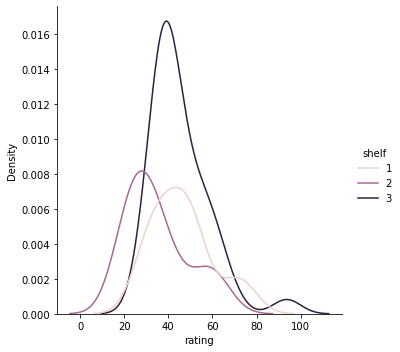

In [25]:
plt.figure(figsize=(12,8))
sns.displot(data = df,x="rating",hue="shelf",kind="kde")
plt.show()

According to data, there is no visual relation between shelfs and ratings

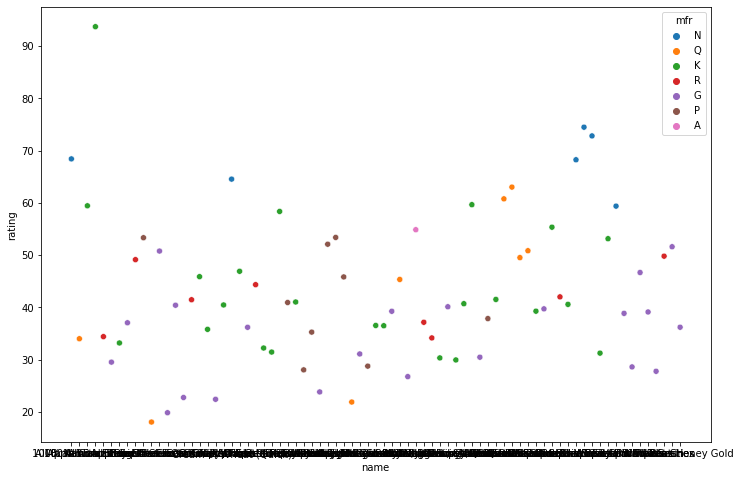

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="name",y="rating",hue="mfr")
plt.show()

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'rating'],
      dtype='object')

In [45]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,78.078,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,236.600,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,78.078,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,118.300,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,177.450,34.384843


In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
    

In [70]:
drop_cols = ["name"]
df_droped = df.drop(drop_cols,axis=1)
df_encoded = MultiColumnLabelEncoder(columns=["mfr","type"]).fit_transform(df_droped)

In [71]:
df_encoded

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
0,3,0,70,4,1,130,10.0,5.0,6,280,25,3,78.078,68.402973
1,5,0,120,3,5,15,2.0,8.0,8,135,0,3,236.600,33.983679
2,2,0,70,4,1,260,9.0,7.0,5,320,25,3,78.078,59.425505
3,2,0,50,4,0,140,14.0,8.0,0,330,25,3,118.300,93.704912
4,6,0,110,2,2,200,1.0,14.0,8,-1,25,3,177.450,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,110,2,1,250,0.0,21.0,3,60,25,3,177.450,39.106174
73,1,0,110,1,1,140,0.0,13.0,12,25,25,2,236.600,27.753301
74,6,0,100,3,1,230,3.0,17.0,3,115,25,1,158.522,49.787445
75,1,0,100,3,1,200,3.0,17.0,3,110,25,1,236.600,51.592193


In [72]:
import mlflow

In [73]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [83]:
def train(model, data):
        
    mlflow.autolog()
    model.fit(data)
    predicts = model.predict(data)
    data["predicts"] = predicts
    data = pd.DataFrame(data)
    return model,data

In [85]:
kmeans = KMeans(n_clusters=2)
modelo,df_final = train(kmeans,df_encoded)

2021/06/14 20:51:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2021/06/14 20:51:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2180ca43f3fd4d5d946dd7f1221059a5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/06/14 20:51:53 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2021/06/14 20:51:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "D:\Anaconda\envs\curso_mit\lib\site-packages\mlflow\models\signature.py:127: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a 

In [86]:
df_final

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,rating,predicts
0,3,0,70,4,1,130,10.0,5.0,6,280,25,3,78.078,68.402973,1
1,5,0,120,3,5,15,2.0,8.0,8,135,0,3,236.600,33.983679,1
2,2,0,70,4,1,260,9.0,7.0,5,320,25,3,78.078,59.425505,1
3,2,0,50,4,0,140,14.0,8.0,0,330,25,3,118.300,93.704912,1
4,6,0,110,2,2,200,1.0,14.0,8,-1,25,3,177.450,34.384843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,110,2,1,250,0.0,21.0,3,60,25,3,177.450,39.106174,0
73,1,0,110,1,1,140,0.0,13.0,12,25,25,2,236.600,27.753301,0
74,6,0,100,3,1,230,3.0,17.0,3,115,25,1,158.522,49.787445,0
75,1,0,100,3,1,200,3.0,17.0,3,110,25,1,236.600,51.592193,0
